In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate, StratifiedKFold
import warnings
warnings.simplefilter("ignore")

- 드라이브에 있는 train_X_df, train_y_df를 사용

In [10]:
X_trn = pd.read_csv("/home/sangjun/work/data/train_X_df.csv")
X_origin = X_trn.copy()
y_trn = pd.read_csv("/home/sangjun/work/data/train_y_df.csv")
X_trn.drop("depressed", axis=1,inplace=True) # depressed가 있어서 삭제

In [8]:
# 5가지의 scoring을 볼 예정
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

clf = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=2023)
scores = cross_validate(clf, X_trn, y_trn, scoring=scoring, cv=5) # 5fold

scores_df = pd.DataFrame(scores)
pd.concat([scores_df, scores_df.apply(['mean', 'std'])])

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1,test_roc_auc
0,5.324392,0.238485,0.562651,0.715385,0.207821,0.322078,0.655358
1,5.329464,0.258095,0.645317,0.821399,0.371556,0.511664,0.783830
2,5.186110,0.245272,0.804655,0.855962,0.732588,0.789484,0.893759
3,4.992473,0.251165,0.912849,0.853363,0.997020,0.919615,0.993532
4,5.037398,0.239917,0.905400,0.842619,0.997020,0.913340,0.993727
mean,5.173967,0.246586,0.766175,0.817745,0.661201,0.691236,0.864041
std,0.156960,0.008143,0.156849,0.058819,0.360587,0.264416,0.145303


- 왜 5fold로 나누었는데 갈수록 값이 증가할까?


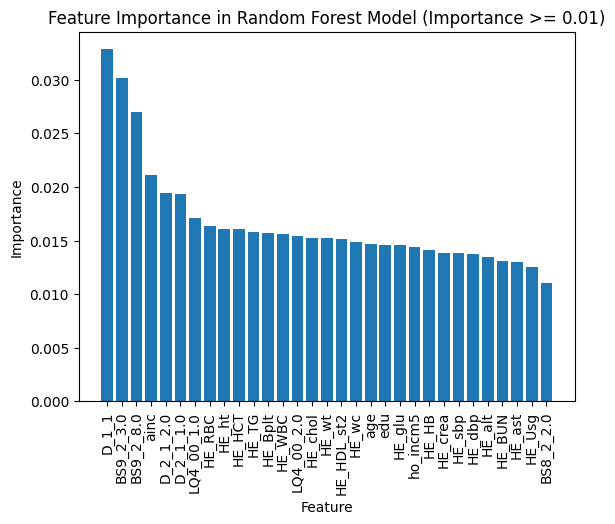

In [9]:
# 사용 모델
model = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=2023)

model.fit(X_trn, y_trn)

# Feature 중요도 계산
feature_importances = model.feature_importances_

# 중요도가 0.01 이상인 feature만 선택
selected_features = X_trn.columns[feature_importances >= 0.01]

# Feature 중요도 시각화
selected_idx = np.argsort(feature_importances[feature_importances >= 0.01])[::-1]

plt.bar(range(len(selected_features)), feature_importances[feature_importances >= 0.01][selected_idx], align="center")
plt.xticks(range(len(selected_features)), selected_features[selected_idx], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance in Random Forest Model (Importance >= 0.01)")
plt.show()

### 결론
- Random Forest를 이용하여 학습시 영향 많이 주는 속성은 없음 아마 ANN에 사용한 feature를 그대로 사용하다 보니 이렇게 된것 같다
- Kfold를 사용할때 왜 score가 점점 증가하는지 이유를 모르겠습니다.


추가로 Heatmap 분석한 부분입니다.

train_X_df의 각 feature들의 상관관계를 분석하고 depressed와 얼마나 연관이 있는지 봅니다.

In [ ]:
import seaborn as sns
sns.set(rc={'figure.figsize':(20,15)})

In [ ]:
df_new = X_origin

In [ ]:
num_features = ["age",
"ainc",
"HE_sbp",
"HE_dbp",
"HE_ht",
"HE_wt",
"HE_wc",
"HE_glu",
"HE_chol",
"HE_HDL_st2",
"HE_TG",
"HE_ast",
"HE_alt",
"HE_HB",
"HE_HCT",
"HE_BUN",
"HE_crea",
"HE_WBC",
"HE_RBC",
"HE_Bplt",
"HE_Uph",
"HE_Usg",
"depressed"
]

In [ ]:
df_num = df_new[num_features]
sns.heatmap(df_num.corr(), annot=True, fmt='.2f')
plt.title("numeric data and depressed correlation")
plt.show()